In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import math
import random
from random import uniform

In [2]:
mnist = pd.read_csv('cp_sample.csv', sep=';')
mnist

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_train, data_test = train_test_split(mnist, test_size = 0.3, random_state = 4)
data_validation, data_test = train_test_split(data_test, test_size = 0.5, random_state = 4)

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
r_f = RandomForestClassifier(n_estimators=10) # this initializes a random forest with 10 trees
r_f.fit(data_train.iloc[:,1:], data_train.label) 
# here we fit this random forest by giving the features of all the
# examples of the training set (columns 1 to last) and their labels

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [6]:
#Prédiction
print("Valeur prédite :")
print(r_f.predict(data_train.iloc[:2, 1:]))

# Verification
print("Valeur réelle :")
print(data_train.iloc[:2, 0])






Valeur prédite :
[8 9]
Valeur réelle :
715    8
920    9
Name: label, dtype: int64


In [7]:
print("Score train :", r_f.score(data_train.iloc[:, 1:], data_train.label))

print("Score validation :", r_f.score(data_validation.iloc[:, 1:], data_validation.label))

Score train : 0.9942857142857143
Score validation : 0.7666666666666667


In [21]:
score_train = []
score_validation = []
list_r_f = []

for i in range(11, 51):
    r_f_more = RandomForestClassifier(n_estimators=i, random_state = 42).fit(data_train.iloc[:,1:], data_train.label)
    list_r_f.append(r_f_more)
    
    score_train.append(r_f_more.score(data_train.iloc[:,1:], data_train.label))
    score_validation.append(r_f_more.score(data_validation.iloc[:,1:], data_validation.label))

#print("Liste de score train :", score_train)
#print("Liste de score validation :", score_validation)
#print("Liste random forest : ", list_r_f)
best_score = np.argmax(score_validation)
print("Le meilleur score est :", best_score)
 



Le meilleur score est : 37


In [ ]:
# L'erreur de géneralisation
error_generalization = 1 - list_r_f[best_score].score(data_test.iloc[:, 1:], data_test.label)
print(error_generalization)

0.09333333333333338


In [11]:
from skimage.feature import hog

In [12]:
import skimage.io
def read_myimage(f):
    myimage = skimage.io.imread(f, as_gray=True)
    i0 = np.where(myimage==0)
    i1 = np.where(myimage == 1)
    myimage[i0] = 1
    myimage[i1] = 0
    plt.imshow(myimage, cmap='Greys')
    return myimage.reshape(1, 28*28)

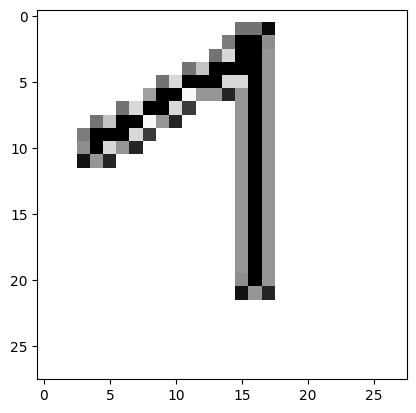

In [13]:
myim = read_myimage('test_1.png')

In [14]:
myimage = mnist.iloc[0,1:] # first image of the mnist dataset (784 pixel values)
myimage_hog = hog(myimage.to_numpy().reshape(28, 28), orientations=8, pixels_per_cell=(14,14), cells_per_block=(1,1), channel_axis=None)
myimage_hog


array([0.70710678, 0.        , 0.70710678, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.63453054, 0.        ,
       0.63453054, 0.        , 0.44129581, 0.        , 0.        ,
       0.        , 0.59539679, 0.        , 0.59539679, 0.        ,
       0.23002187, 0.        , 0.48795006, 0.        , 0.70710678,
       0.        , 0.70710678, 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [15]:
def my_hog(row, ori, cell):
    return(pd.Series(hog(row.iloc[1:].to_numpy().reshape(28,28,1), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(1,1),channel_axis=2)))

In [16]:
hog_train = data_train.apply(my_hog, axis=1, args=(8,14))
hog_valid= data_validation.apply(my_hog, axis=1, args=(8,14))
hog_test = data_test.apply(my_hog, axis=1, args=(8,14))
hog_train['label'] = data_train.label
hog_valid['label'] = data_validation.label
hog_test['label'] = data_test.label

In [17]:
hog_train

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,label
715,0.502681,0.0,0.502681,0.0,0.491869,0.0,0.502681,0.0,0.331770,0.0,...,0.0,0.500000,0.0,0.500000,0.0,0.500000,0.0,0.500000,0.0,8
920,0.699372,0.0,0.699372,0.0,0.147506,0.0,0.000000,0.0,0.500000,0.0,...,0.0,0.681478,0.0,0.681478,0.0,0.000000,0.0,0.266785,0.0,9
295,0.465444,0.0,0.618883,0.0,0.618883,0.0,0.131647,0.0,0.500000,0.0,...,0.0,0.307510,0.0,0.543607,0.0,0.552236,0.0,0.552236,0.0,2
83,0.517744,0.0,0.517744,0.0,0.517744,0.0,0.442518,0.0,0.568812,0.0,...,0.0,0.577350,0.0,0.577350,0.0,0.577350,0.0,0.000000,0.0,0
942,0.604642,0.0,0.604642,0.0,0.377247,0.0,0.355672,0.0,0.603838,0.0,...,0.0,0.577350,0.0,0.577350,0.0,0.577350,0.0,0.000000,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,0.577350,0.0,0.577350,0.0,0.577350,0.0,0.000000,0.0,0.555912,0.0,...,0.0,0.572579,0.0,0.572579,0.0,0.572579,0.0,0.128290,0.0,0
709,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.615943,0.0,...,0.0,0.656532,0.0,0.754298,0.0,0.000000,0.0,0.000000,0.0,1
439,0.707107,0.0,0.707107,0.0,0.000000,0.0,0.000000,0.0,0.566947,0.0,...,0.0,0.558947,0.0,0.558947,0.0,0.558947,0.0,0.250470,0.0,0
174,0.500000,0.0,0.500000,0.0,0.500000,0.0,0.500000,0.0,0.197028,0.0,...,0.0,0.500000,0.0,0.500000,0.0,0.500000,0.0,0.500000,0.0,5


In [ ]:
hog_score_train = []
hog_score_validation = []
hog_list_r_f = []

for i in range(11, 51):
    hog_r_f_more = RandomForestClassifier(n_estimators=i, random_state = 42).fit(hog_train.iloc[:,:32], hog_train.label)
    hog_list_r_f.append(hog_r_f_more)
    
    hog_score_train.append(hog_r_f_more.score(hog_train.iloc[:, :32], hog_train.label))
    hog_score_validation.append(hog_r_f_more.score(hog_valid.iloc[:, :32], hog_valid.label))

#print("Liste de score train :", score_train)
#print("Liste de score validation :", score_validation)
#print("Liste random forest : ", list_r_f)
hog_position_best_score = np.argmax(hog_score_validation)
print("Hog meilleur score est :", hog_position_best_score)

33


In [23]:
hog_error = 1 - hog_list_r_f[hog_position_best_score].score(hog_test.iloc[:, :32], hog_test.label)
print("Erreur de géneralisation du hog est : ", hog_error)

Erreur de géneralisation du hog est :  0.26


In [24]:
#Conclusion
if error_generalization > hog_error:
    print("La meilleure procedure est celle avec les images hog : ", hog_error)
else:
    print("La meilleure procédure est celle avec les forêts aléatoires : ", error_generalization)

La meilleure procédure est celle avec les forêts aléatoires :  0.09333333333333338
